# Forecasting

## Config environemnt

In [270]:
# Import library to use operating system functions
import os

In [271]:
# Set workspace
for dirname, _, filenames in os.walk('/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/.DS_Store
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/Solicitud de Inicio de Práctica - Erick Dávila.docx
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/Informe de Avance 150 horas.docx
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/ALCANCE ESCANEADO PRACTICANTE ERICK DAVILA 2024.pdf
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/2024 - trimestre 6/Prácticas/Solicitud de Inicio de Práctica - Erick Dávila Test.docx
/Users/macbookpro/Library/CloudStorage/GoogleDrive-erick.e.davila@gmail.com/My Drive/education/usac/master/

## Load data

In [272]:
# Import library to manage files
import pandas as pd

In [273]:
# Cargar el dataset
data = pd.read_csv('UCI_Credit_Card.csv')

data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [274]:
# Select variables for forecasting
forecast_columns = ['LIMIT_BAL', 
                    'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

data_forecast = data[forecast_columns]

data_forecast.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


## EDA

In [275]:
# Resumen estadístico
print(data_forecast.describe())

            LIMIT_BAL         PAY_1         PAY_2         PAY_3         PAY_4  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667     -0.016700     -0.133767     -0.166200     -0.220667   
std     129747.661567      1.123802      1.197186      1.196868      1.169139   
min      10000.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%      50000.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%     140000.000000      0.000000      0.000000      0.000000      0.000000   
75%     240000.000000      0.000000      0.000000      0.000000      0.000000   
max    1000000.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.

In [276]:
# Verify null data
data_forecast.isnull().sum()

LIMIT_BAL    0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [277]:
# Replace null data with mean values
data_forecast.fillna(data_forecast.mean(), inplace=True)

/var/folders/1l/1176zbkd1hd_ksjsrk705xxc0000gn/T/ipykernel_31974/1518062019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_forecast.fillna(data_forecast.mean(), inplace=True)


In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

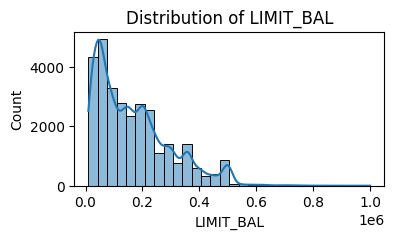

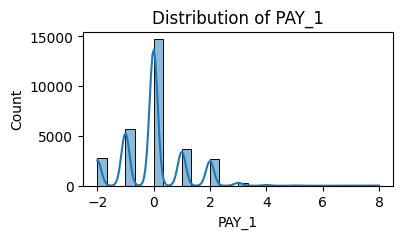

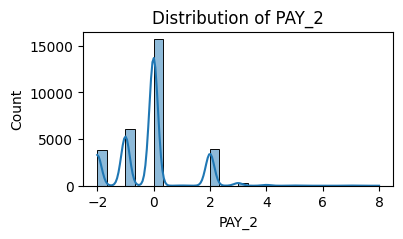

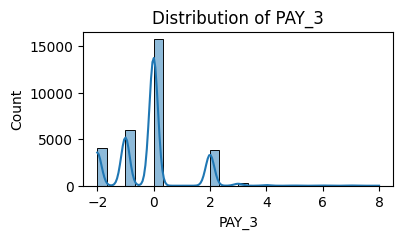

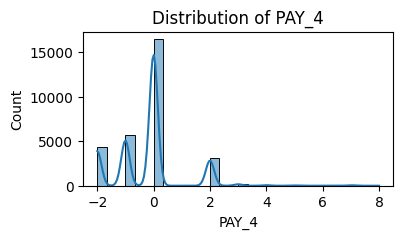

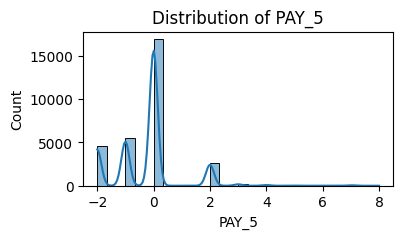

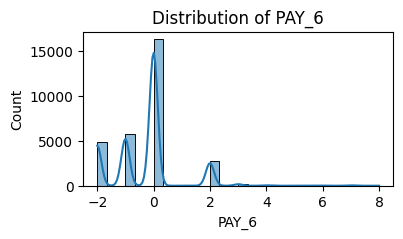

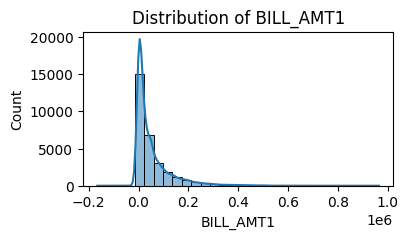

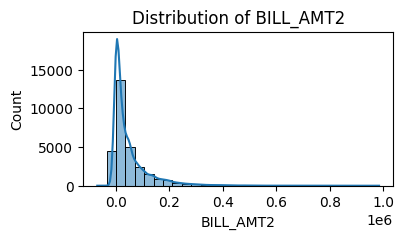

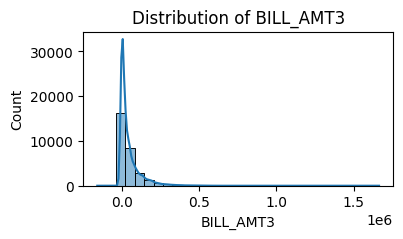

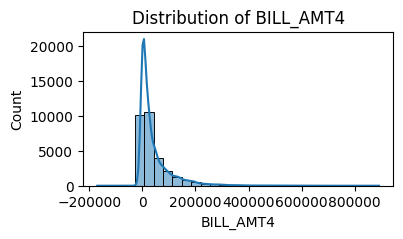

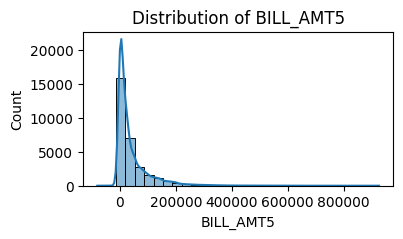

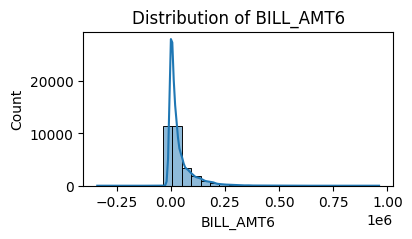

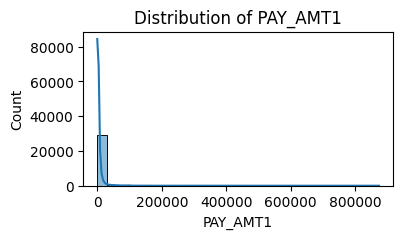

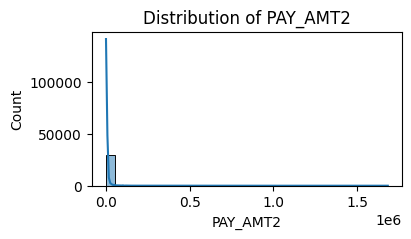

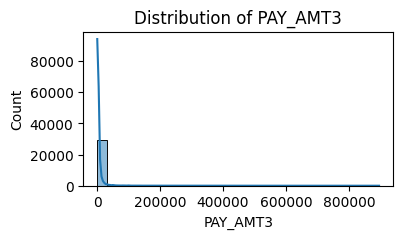

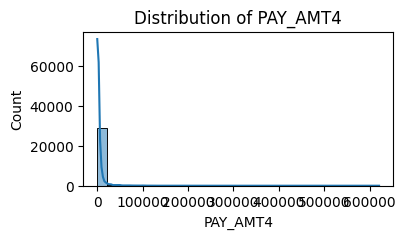

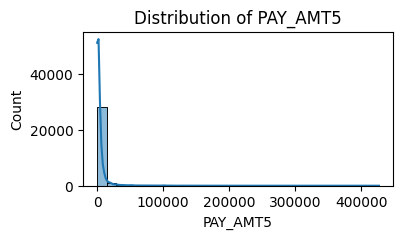

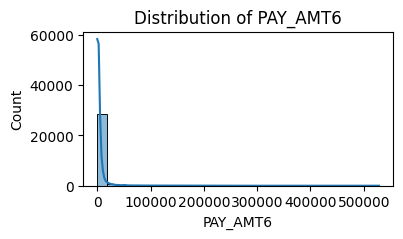

In [279]:
# Histograms for numeric variables
numeric_columns = data_forecast.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure(figsize=(4, 2))
    sns.histplot(data_forecast[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


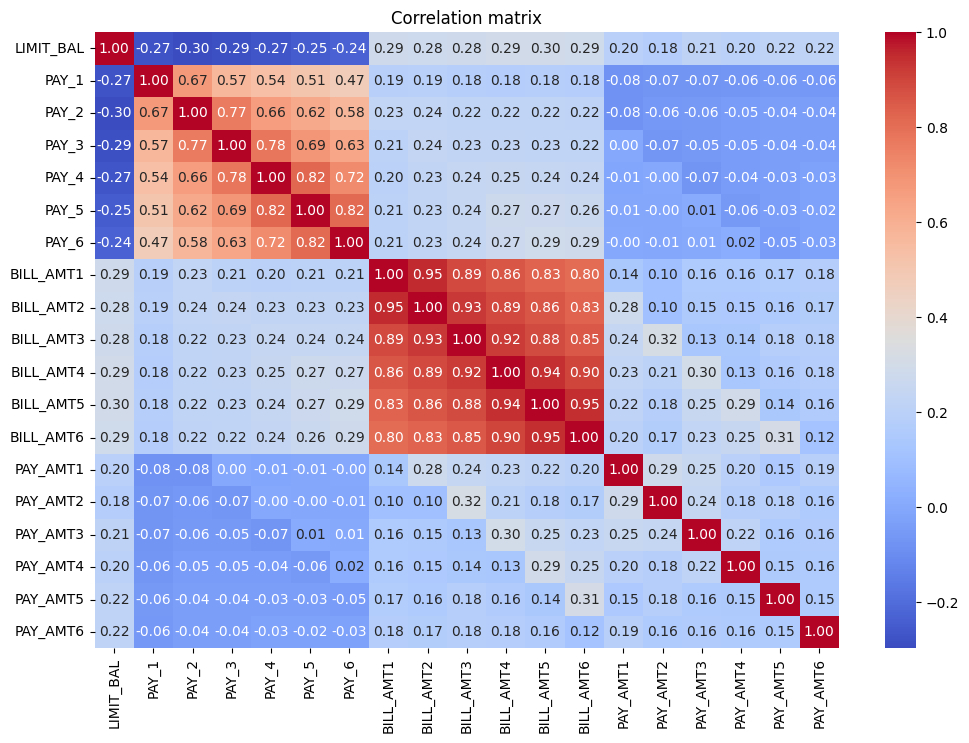

In [280]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data_forecast.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

## Prepare data for Forcasting

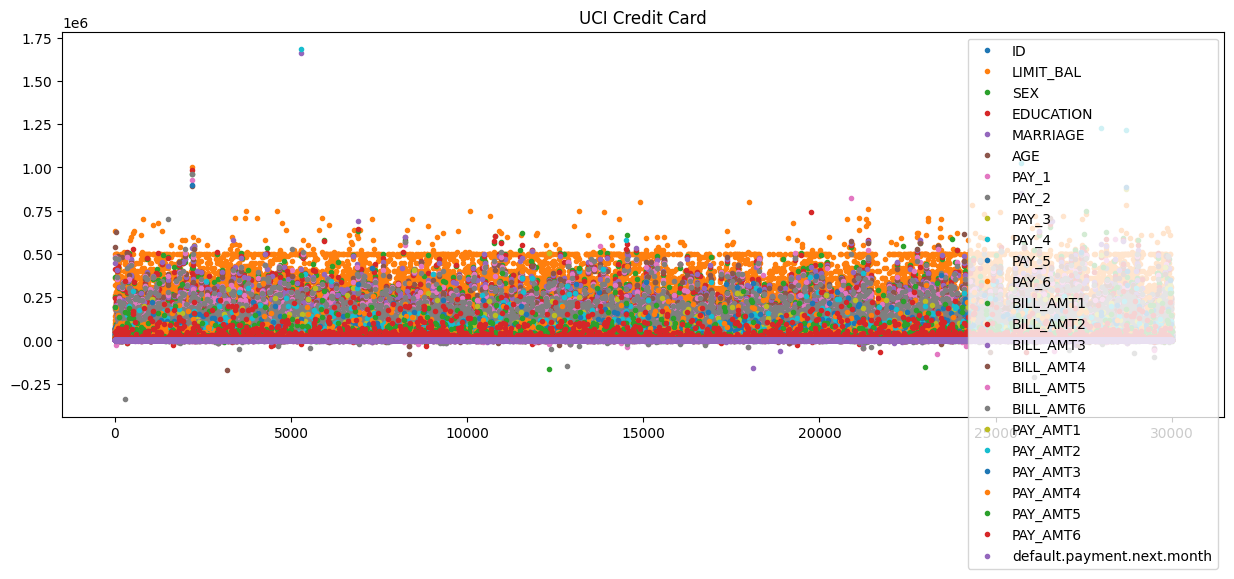

In [281]:
_ = data.plot(style='.', figsize=(15,5), title='UCI Credit Card')

In [282]:
# Reshape the data for plotting
bill_amt_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
data_melted = data.melt(id_vars=['ID'], value_vars=bill_amt_columns, var_name='Month', value_name='BILL_AMT')

# Map the month names to more readable format
month_mapping = {
    'BILL_AMT1': 'Month 1',
    'BILL_AMT2': 'Month 2',
    'BILL_AMT3': 'Month 3',
    'BILL_AMT4': 'Month 4',
    'BILL_AMT5': 'Month 5',
    'BILL_AMT6': 'Month 6'
}
data_melted['Month'] = data_melted['Month'].map(month_mapping)

data_melted = data_melted[['Month', 'BILL_AMT']]

data_melted.head()

,Month,BILL_AMT
0,Month 1,3913.0
1,Month 1,2682.0
2,Month 1,29239.0
3,Month 1,46990.0
4,Month 1,8617.0


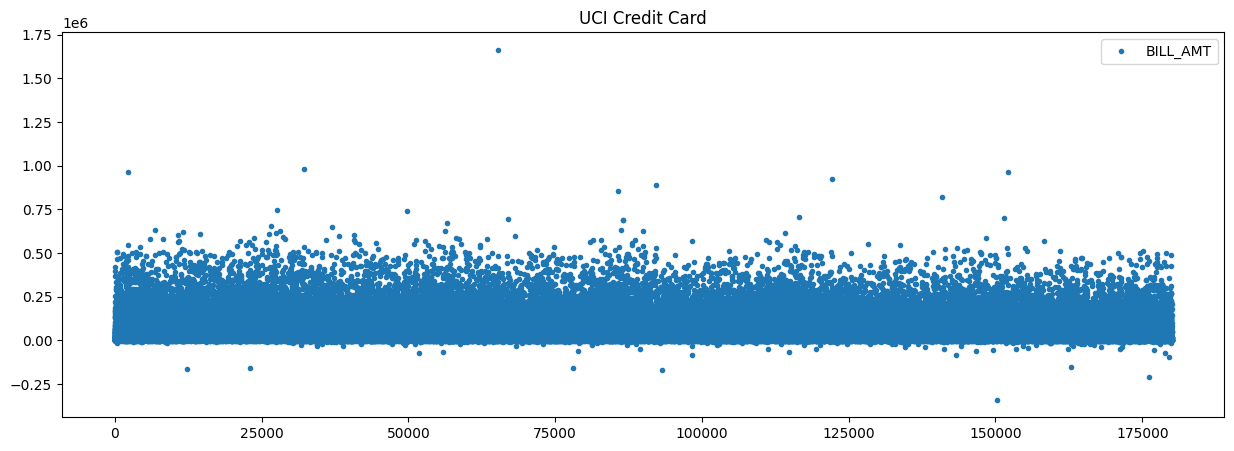

In [283]:
_ = data_melted.plot(style='.', figsize=(15,5), title='UCI Credit Card')

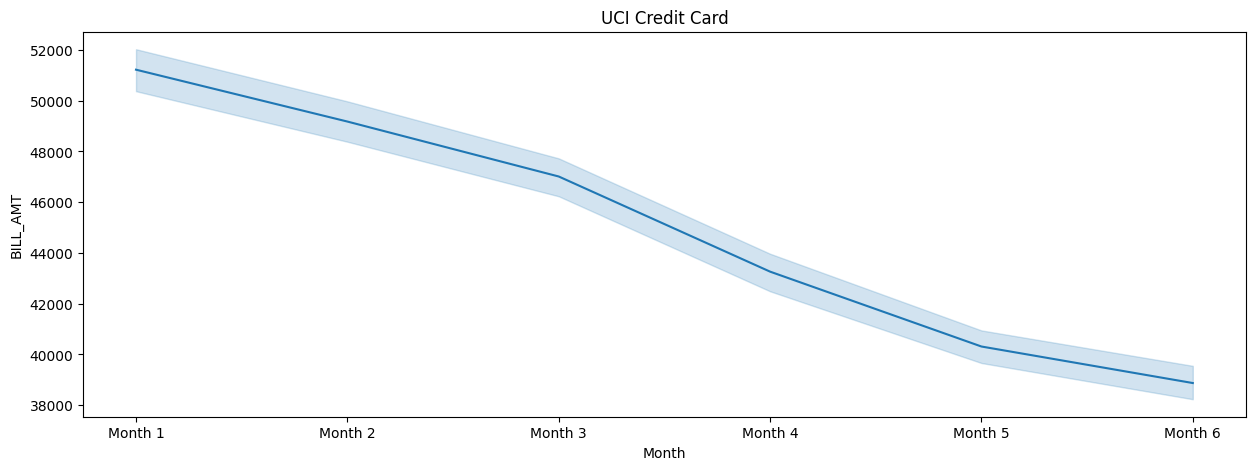

In [284]:
#Plot BILL_AMT vs Month using line plot
plt.figure(figsize=(15,5))
sns.lineplot(x='Month', y='BILL_AMT', data=data_melted)
plt.title('UCI Credit Card')
plt.show()

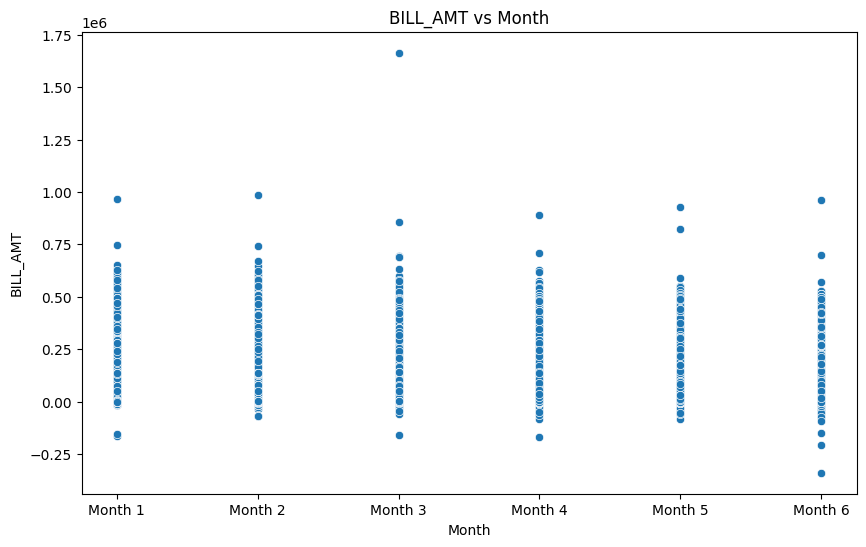

In [285]:
# Plot BILL_AMT vs Month using scatter plot showing all values in the same month
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_melted, x='Month', y='BILL_AMT')
plt.title('BILL_AMT vs Month')
plt.show()


In [286]:
# Select only one value for month where all values are different from 0
data_melted = data_melted[data_melted['BILL_AMT'] != 0]

data_melted

,Month,BILL_AMT
0,Month 1,3913.0
1,Month 1,2682.0
2,Month 1,29239.0
3,Month 1,46990.0
4,Month 1,8617.0
...,...,...
179994,Month 6,81158.0
179995,Month 6,15980.0
179997,Month 6,19357.0
179998,Month 6,48944.0


In [287]:
# Select only the first value of each month
data_melted = data_melted.groupby('Month').first().reset_index()

data_melted

,Month,BILL_AMT
0,Month 1,3913.0
1,Month 2,3102.0
2,Month 3,689.0
3,Month 4,3272.0
4,Month 5,3455.0
5,Month 6,3261.0


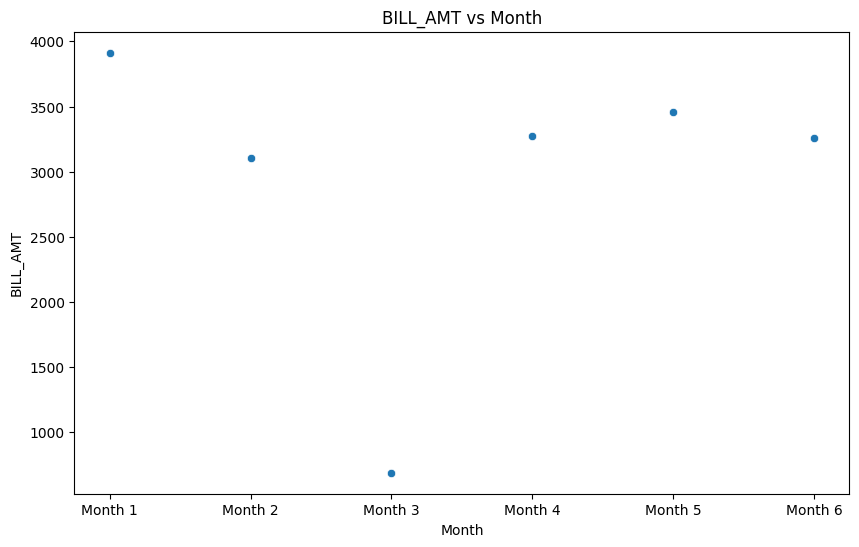

In [288]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_melted, x='Month', y='BILL_AMT')
plt.title('BILL_AMT vs Month')
plt.show()

In [289]:
split_month = 'Month 5'

data_train = data_melted[data_melted["Month"] < split_month]
data_test = data_melted[data_melted["Month"] >= split_month]

print(data_train)
print(data_test)

     Month  BILL_AMT
0  Month 1    3913.0
1  Month 2    3102.0
2  Month 3     689.0
3  Month 4    3272.0
     Month  BILL_AMT
4  Month 5    3455.0
5  Month 6    3261.0


In [290]:
data_train_indexed = data_train.set_index("Month")
data_test_indexed = data_test.set_index("Month")

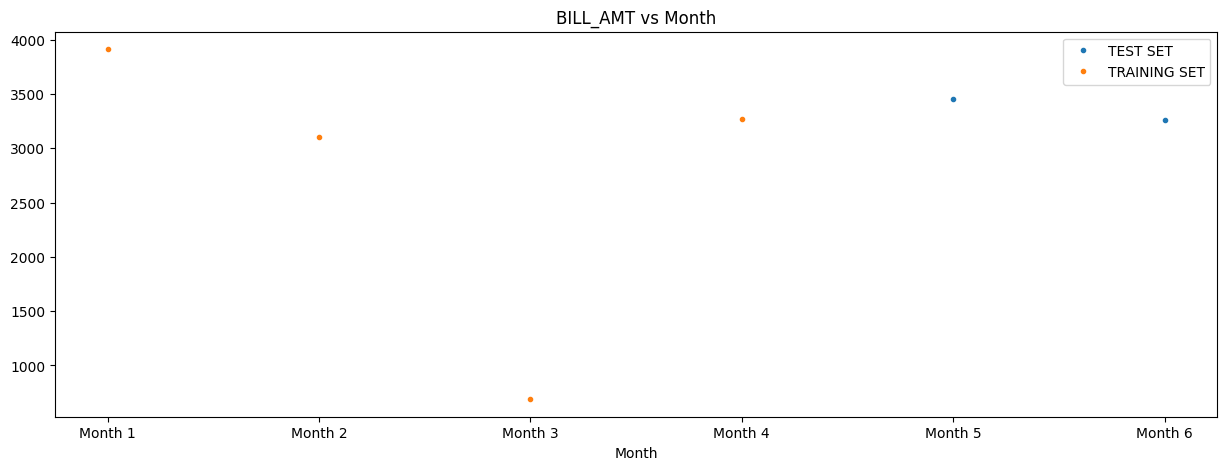

In [291]:
_ = data_test_indexed \
    .rename(columns={'BILL_AMT': 'TEST SET'}) \
    .join(data_train_indexed.rename(columns={'BILL_AMT': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='BILL_AMT vs Month', style='.')

## Split data

In [307]:
# Create numerical mapping for Months
month_mapping = { month: i + 1 for i, month in enumerate(data_train["Month"].tolist() + data_test["Month"].tolist()) }

# Map "Month" to numerical values safely
data_train.loc[:, "Month_Num"] = data_train["Month"].map(month_mapping)
data_test.loc[:, "Month_Num"] = data_test["Month"].map(month_mapping)

# Prepare the data for XGBoost model
X_train = data_train["Month_Num"].values.reshape(-1, 1)
y_train = data_train["BILL_AMT"]
X_test = data_test["Month_Num"].values.reshape(-1, 1)
y_test = data_test["BILL_AMT"]


## XGBoost model

In [308]:
# Train XGBoost model
model_forecast = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_forecast.fit(X_train, y_train)

# Predict with test data
y_pred_test = model_forecast.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 97.0
MSE: 16805.12597709894
R²: -0.7860692929215582


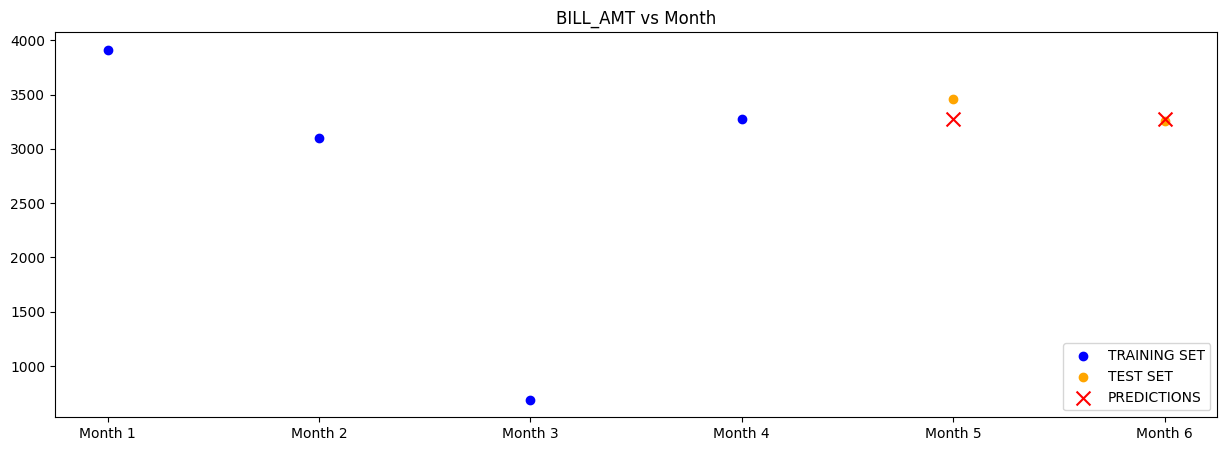

In [309]:
# Plot
plt.figure(figsize=(15, 5))
plt.scatter(data_train["Month_Num"], data_train["BILL_AMT"], label="TRAINING SET", color='blue')
plt.scatter(data_test["Month_Num"], data_test["BILL_AMT"], label="TEST SET", color='orange')
plt.scatter(data_test["Month_Num"], y_pred_test, label="PREDICTIONS", color='red', marker='x', s=100)

# Set x-axis labels to months
plt.xticks(list(month_mapping.values()), list(month_mapping.keys()))
plt.title("BILL_AMT vs Month")
plt.legend(loc='lower right',)
plt.show()

## ARIMA model

In [294]:
import numpy as np
import statsmodels.api as sm

In [310]:
# Train ARIMA model (p, d, q)
model_arima = sm.tsa.ARIMA(y_train, order=(1,1,1))
model_fit = model_arima.fit()

# Predict on test set
forecast = model_fit.forecast(steps=len(y_test))

# Evaluate performance
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
r2 = r2_score(y_test, forecast)

print(f"ARIMA Model Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

ARIMA Model Metrics:
MAE: 1030.6268435268144
MSE: 1101891.1985242707
R²: -116.11034100587423


/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [300]:
forecast

4    2225.125803
5    2429.620510
Name: predicted_mean, dtype: float64

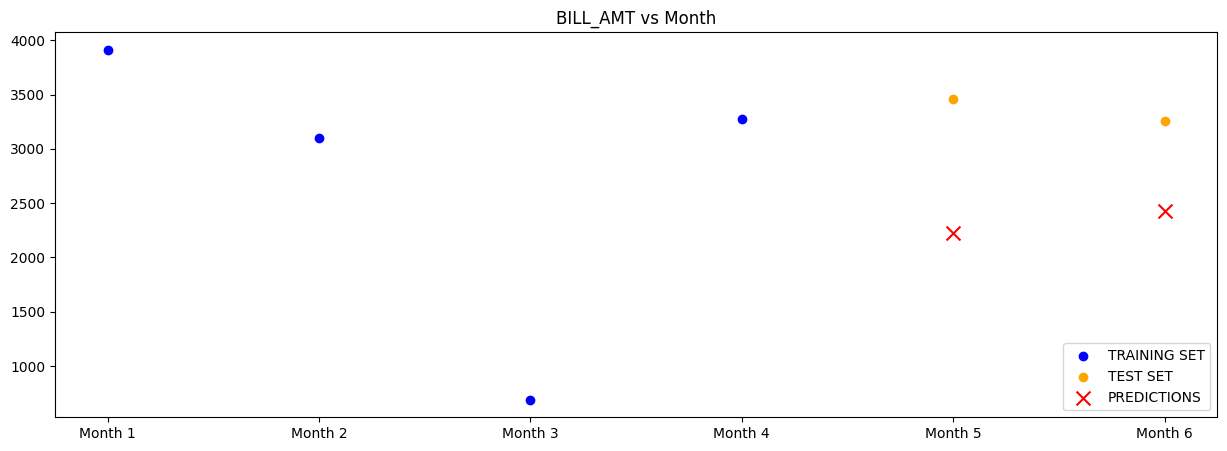

In [311]:
# Plot
plt.figure(figsize=(15, 5))
plt.scatter(data_train["Month_Num"], data_train["BILL_AMT"], label="TRAINING SET", color='blue')
plt.scatter(data_test["Month_Num"], data_test["BILL_AMT"], label="TEST SET", color='orange')
plt.scatter(data_test["Month_Num"], forecast, label="PREDICTIONS", color='red', marker='x', s=100)

# Set x-axis labels to months
plt.xticks(list(month_mapping.values()), list(month_mapping.keys()))
plt.title("BILL_AMT vs Month")
plt.legend(loc='lower right',)
plt.show()

## SARIMA model

In [314]:
model_sarima = sm.tsa.SARIMAX(y_train, order=(1,1,1))
model_fit_sarima = model_sarima.fit()

# Predict with SARIMA
forecast_sarima = model_fit_sarima.forecast(steps=len(y_test))

# Evaluate performance
mae = mean_absolute_error(y_test, forecast_sarima)
mse = mean_squared_error(y_test, forecast_sarima)
r2 = r2_score(y_test, forecast_sarima)

print(f"ARIMA Model Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81772D+00    |proj g|=  5.15031D-01

At iterate    5    f=  6.56454D+00    |proj g|=  5.80981D-03

At iterate   10    f=  6.56440D+00    |proj g|=  3.92138D-04

At iterate   15    f=  6.56429D+00    |proj g|=  7.50283D-03

At iterate   20    f=  6.48394D+00    |proj g|=  1.75095D-03

At iterate   25    f=  6.48394D+00    |proj g|=  7.77438D-04

At iterate   30    f=  6.48391D+00    |proj g|=  2.86296D-03

At iterate   35    f=  6.48388D+00    |proj g|=  9.24052D-04

At iterate   40    f=  6.48388D+00    |proj g|=  8.17059D-05
ARIMA Model Metrics:
MAE: 1030.6268435268144
MSE: 1101891.1985242707
R²: -116.11034100587423

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of 

/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


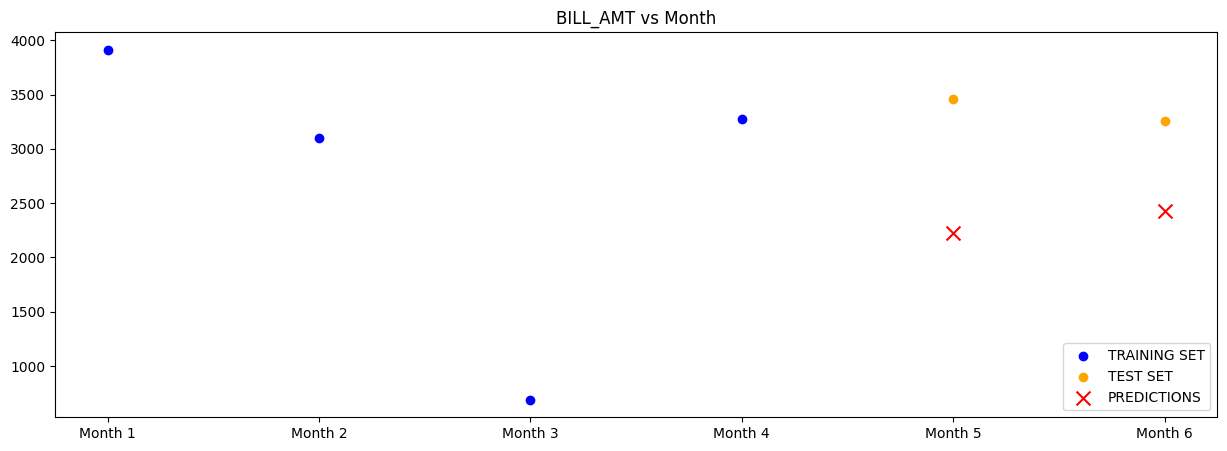

In [316]:
# Plot
plt.figure(figsize=(15, 5))
plt.scatter(data_train["Month_Num"], data_train["BILL_AMT"], label="TRAINING SET", color='blue')
plt.scatter(data_test["Month_Num"], data_test["BILL_AMT"], label="TEST SET", color='orange')
plt.scatter(data_test["Month_Num"], forecast_sarima, label="PREDICTIONS", color='red', marker='x', s=100)

# Set x-axis labels to months
plt.xticks(list(month_mapping.values()), list(month_mapping.keys()))
plt.title("BILL_AMT vs Month")
plt.legend(loc='lower right',)
plt.show()